<a href="https://colab.research.google.com/github/brangineni/5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Background

I'm driven by a desire to understand the intricate factors that influence life expectancy, a longstanding pursuit in public health and social science. While previous studies have primarily focused on demographics, income, and health indicators, I believe crucial aspects like societal influences, including alcohol consumption, deserve deeper exploration. Past research often relied on limited data scope or neglected interactions between factors, hindering our understanding of the complex relationships impacting human longevity. This project aims to leverage comprehensive datasets encompassing multiple years and diverse countries, allowing me to identify key interactions and influences on life expectancy across a wider spectrum of contexts, including potential influences of social factors like alcohol consumption.

# Data Sources:

Life Expectancy (WHO): This dataset provides life expectancy data for 193 countries from 2000 to 2015, along with various health, economic, social, and demographic factors. It includes information on immunization rates, mortality rates, GDP, population, and human development index. (Source: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

Population by Country - 2020: This dataset provides population figures for all countries in the world as of 2020. It serves as a reference for population size and density, which may influence access to resources and potentially impact life expectancy. (Source: https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020: https://www.kaggle.com/datasets/tanuprabhu/population-by-country-2020)

Total alcohol per capita consumption (WHO): This dataset provides data on the total amount of alcohol consumed per adult (15+ years) over a calendar year, in litres of pure alcohol. It adds another dimension to understanding potential societal influences, such as cultural norms and health risks, on life expectancy. (Source: https://data.who.int/indicators/i/EE6F72A: https://data.who.int/indicators/i/EE6F72A)

# Features:

Life Expectancy: The dependent variable, representing the average number of years a person can expect to live in a given country.
Immunization rates: Coverage rates for key vaccines like Hepatitis B, Polio, and Diphtheria.

Mortality rates: Infant mortality rate, adult mortality rate, and specific causes of death.

Economic factors: GDP, GDP per capita, and income composition of resources.

Social factors: Population density, educational attainment, human development index, and alcohol consumption per capita.

Demographic factors: Population size, age distribution, and urbanization rate.


# Hypothesis :

H1: Is there a significant trend in alcohol consumption over the years, and if so, how has it changed? Are there any notable patterns or fluctuations in alcohol consumption rates?

H2: Is there a statistically significant relationship between a country's population and its alcohol consumption? Specifically, does the size of the population have an impact on the level of alcohol consumption, and if so, what is the nature of this relationship? Are countries with larger populations more likely to have higher or lower rates of alcohol consumption per capita?

H3: How do population size influence life expectancy levels?

H4: Is there a significant difference in alcohol consumption between different genders? Are males, females, or the total population exhibiting distinct patterns of alcohol consumption, and if so, what are the key observations?

H5: Is there a statistically significant relationship between adult mortality rates and alcohol consumption? Specifically, does the level of alcohol consumption in a population correlate with the adult mortality rate, and if so, what is the nature of this relationship? Are regions or countries with higher alcohol consumption more likely to experience higher or lower adult mortality rates?

# Importing Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Importing and Displaying the Life Expectancy Dataset

In [2]:

def import_and_display_data(file_path):
    # Read the CSV file into a pandas DataFrame
    life_expectancy_data = pd.read_csv(file_path)

    # Display the DataFrame
    print(life_expectancy_data.head())

    # Display the DataFrame info
    print(life_expectancy_data.info())

    return life_expectancy_data

# Column selection.

 The next step is to Select the columns needed for this analysis: Country, Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, Polio, Total expenditure, Diphtheria, GDP, Population, and Schooling.


In [3]:
def filter_columns(data_frame, required_columns):
    # Select required columns
    life_expectancy_data_filtered = data_frame[required_columns]

    # Display the head of the filtered DataFrame
    print(life_expectancy_data_filtered.head())

    return life_expectancy_data_filtered


# Handle missing values

In [4]:
def handle_missing_values(data_frame):
    # Check for missing values by counting them
    missing_values_count = data_frame.isnull().sum()
    print("Number of missing values per column:")
    print(missing_values_count)

    # Fill missing values with specific values
    df_cleaned = data_frame.fillna(value={'Alcohol': 0.0, 'Hepatitis B': data_frame['Hepatitis B'].mean()})

    # Check for remaining missing values
    missing_values_count = df_cleaned.isnull().sum()

    # Drop rows with any remaining missing values
    df_cleaned = df_cleaned.dropna()

    # Check the number of remaining rows after dropping
    print(f"Number of rows after dropping missing values: {len(df_cleaned)}")

    # Print the number of remaining missing values after filling
    print("Number of remaining missing values after filling:")
    print(missing_values_count)

    return df_cleaned


# Removing the missing values from this dataset

# Saving the cleaned dataset

In [5]:
def save_cleaned_data(data_frame, output_filename):
    # Save the cleaned DataFrame to a CSV file
    data_frame.to_csv(output_filename, index=False)

    # Print confirmation message
    print(f"Cleaned dataset saved successfully as '{output_filename}'")


# Pre-processing steps of the first dataset

In [6]:
# Define the file path
file_path = "/content/cleaned_life_expectancy_data.xlsx"

# Define required columns
required_columns = ["Country", "Year", "Life expectancy ", "Adult Mortality",
                    "infant deaths", "Alcohol", "percentage expenditure",
                    "Hepatitis B", "Measles ", "Polio", "Total expenditure",
                    "Diphtheria ", "GDP", "Population", "Schooling"]

# Define the output filename
cleaned_data_filename = "cleaned_life_expectancy_data.xlsx"

# Step 1: Import and display data
data = import_and_display_data(file_path)

# Step 2: Filter columns
filtered_data = filter_columns(data, required_columns)

# Step 3: Handle missing values
cleaned_data = handle_missing_values(filtered_data)

# Step 4: Save cleaned data
save_cleaned_data(cleaned_data, cleaned_data_filename)


       Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0  Afghanistan  2015              65.0            263.0             62   
1  Afghanistan  2014              59.9            271.0             64   
2  Afghanistan  2013              59.9            268.0             66   
3  Afghanistan  2012              59.5            272.0             69   
4  Afghanistan  2011              59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   Polio  \
0     0.01               71.279624         65.0      1154    6.0   
1     0.01               73.523582         62.0       492   58.0   
2     0.01               73.219243         64.0       430   62.0   
3     0.01               78.184215         67.0      2787   67.0   
4     0.01                7.097109         68.0      3013   68.0   

   Total expenditure  Diphtheria          GDP  Population  Schooling  
0               8.16         65.0  584.259210  33736494.0       10.1  
1   

# Procceding to the second dataset: Population by Country - 2020

<h3> Step 1 is to import the dataset and display its contents </h3>

In [7]:
def import_and_display_population_data(file_path):
    # Read the CSV file into a pandas DataFrame
    population_data = pd.read_csv(file_path)

    # Display the data
    print(population_data)

    return population_data


# Select relevant columns from the dataset

In [8]:
def select_relevant_columns(data_frame, columns):
    # Select relevant columns
    selected_data = data_frame[columns]

    return selected_data

# Renaming the columns for easier merging

In [9]:
def rename_columns(data_frame, column_mapping):
    # Rename the column names for easier merging
    data_frame.rename(columns=column_mapping, inplace=True)



# Then I handle the missing values

In [10]:
def handle_missing_values(data_frame, column, method='mean'):
    # Handle missing values by imputing
    if method == 'mean':
        data_frame[column].fillna(data_frame[column].mean(), inplace=True)


# Data Transformation

In [11]:
def convert_data_types(data_frame, column, data_type):
    # Convert data types
    data_frame[column] = data_frame[column].astype(data_type)


# Handle duplicates

In [12]:
def check_and_handle_duplicates(data_frame, subset_column, keep='first'):
    # Check for duplicates based on the specified column
    duplicates = data_frame[subset_column].duplicated()

    # Handle duplicates
    data_frame.drop_duplicates(subset=subset_column, keep=keep, inplace=True)

    return data_frame


# Display the second cleaned dataset

In [13]:
def display_cleaned_data(data_frame):
    # Display the cleaned data for confirmation
    print(data_frame)

# Processing the second dataset

In [14]:
# Define the file path
population_file_path = "/content/population_by_country_2020.csv"

# Define relevant columns
population_required_columns = ["Country (or dependency)", "Population (2020)"]

# Define column mapping for renaming
population_column_mapping = {"Country (or dependency)": "Country"}

# Step 1: Import and display population data
population_data = import_and_display_population_data(population_file_path)

# Step 2: Select relevant columns
selected_population_data = select_relevant_columns(population_data, population_required_columns)

# Step 3: Rename columns
rename_columns(selected_population_data, population_column_mapping)

# Step 4: Handle missing values
handle_missing_values(selected_population_data, "Population (2020)")

# Step 5: Convert data types
convert_data_types(selected_population_data, "Country", str)

# Step 6: Check and handle duplicates
cleaned_population_data = check_and_handle_duplicates(selected_population_data, "Country")

# Step 7: Display cleaned data
display_cleaned_data(cleaned_population_data)

    Country (or dependency)  Population (2020) Yearly Change  Net Change  \
0                     China         1440297825        0.39 %     5540090   
1                     India         1382345085        0.99 %    13586631   
2             United States          331341050        0.59 %     1937734   
3                 Indonesia          274021604        1.07 %     2898047   
4                  Pakistan          221612785        2.00 %     4327022   
..                      ...                ...           ...         ...   
230              Montserrat               4993        0.06 %           3   
231        Falkland Islands               3497        3.05 %         103   
232                    Niue               1628        0.68 %          11   
233                 Tokelau               1360        1.27 %          17   
234                Holy See                801        0.25 %           2   

     Density (P/Km²)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0         

<ipython-input-9-2dba5e919a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.rename(columns=column_mapping, inplace=True)
<ipython-input-10-3182d6484fc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column].fillna(data_frame[column].mean(), inplace=True)
<ipython-input-11-603d68491e54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame[column

# Merging the first two datasets.

Now that I have prepared the first two datasets. It is time to merge them.

In [15]:
# Merge the DataFrames based on the common "Country" identifier
merged_data1 = df_cleaned.merge(population_data, how="inner", on="Country")

# Display the merged data
merged_data1

NameError: ignored

# Moving on to the third dataset: Total alcohol per capita consumption (WHO)

In [16]:
# Define the path to the dataset
alcohol_data_path = "/content/EE6F72A_ALL_LATEST.csv"

# Read the data into a DataFrame
alcohol_df = pd.read_csv(alcohol_data_path)

alcohol_df

,IND_UUID,IND_NAME,IND_CODE,DIM_GEO_CODE_M49,GEO_NAME_SHORT,DIM_TIME,DIM_TIME_TYPE,DIM_1_CODE,DIM_MEMBER_1_CODE,DIM_MEMBER_1,DIM_VALUE_TYPE,VALUE_NUMERIC,VALUE_NUMERIC_LOWER,VALUE_NUMERIC_UPPER,VALUE_COMMENTS,DIM_PUBLISH_STATE_CODE
0,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,11,Western Africa,2000,YEAR,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,5.56636,4.19442,7.09347,WHO Global Information System on Alcohol and H...,PUBLISHED
1,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,11,Western Africa,2000,YEAR,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.94894,1.47438,2.50247,WHO Global Information System on Alcohol and H...,PUBLISHED
2,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,11,Western Africa,2000,YEAR,DIM_SEX,MALE,Male,RATE_PER_CAPITA,9.24325,6.93832,11.76668,WHO Global Information System on Alcohol and H...,PUBLISHED
3,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,13,Central America,2000,YEAR,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,5.45966,3.55647,7.35149,WHO Global Information System on Alcohol and H...,PUBLISHED
4,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,13,Central America,2000,YEAR,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,2.23777,1.43910,3.05796,WHO Global Information System on Alcohol and H...,PUBLISHED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,894,Zambia,2019,YEAR,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.48234,0.78414,2.25537,WHO Global Information System on Alcohol and H...,PUBLISHED
3524,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,894,Zambia,2019,YEAR,DIM_SEX,MALE,Male,RATE_PER_CAPITA,6.33853,3.44618,9.39101,WHO Global Information System on Alcohol and H...,PUBLISHED
3525,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,716,Zimbabwe,2019,YEAR,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,3.62809,1.81645,5.57807,WHO Global Information System on Alcohol and H...,PUBLISHED
3526,EE6F72A,Alcohol consumption (age 15+),SA_0000001688,716,Zimbabwe,2019,YEAR,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.24546,0.62103,1.95997,WHO Global Information System on Alcohol and H...,PUBLISHED


# Performing data preparation.

In [17]:

# Drop unnecessary columns
alcohol_df = alcohol_df.drop(['IND_UUID', 'IND_NAME', 'IND_CODE', 'DIM_TIME_TYPE', 'VALUE_COMMENTS', 'DIM_PUBLISH_STATE_CODE'], axis=1)

# Convert 'DIM_TIME' to datetime format
alcohol_df['DIM_TIME'] = pd.to_datetime(alcohol_df['DIM_TIME'], format='%Y')

# Rename columns for better readability
alcohol_df = alcohol_df.rename(columns={
    'DIM_GEO_CODE_M49': 'GEO_CODE',
    'GEO_NAME_SHORT': 'Country',
    'DIM_1_CODE': 'SEX_CODE',
    'DIM_MEMBER_1_CODE': 'SEX',
    'DIM_MEMBER_1': 'SEX_DESCRIPTION',
    'DIM_VALUE_TYPE': 'VALUE_TYPE',
    'VALUE_NUMERIC': 'ALCOHOL_CONSUMPTION',
    'VALUE_NUMERIC_LOWER': 'ALCOHOL_CONSUMPTION_LOWER',
    'VALUE_NUMERIC_UPPER': 'ALCOHOL_CONSUMPTION_UPPER'
})

# Optionally, handle missing or invalid values
alcohol_df = alcohol_df.dropna()  # Drop rows with missing values
alcohol_df = alcohol_df[alcohol_df['ALCOHOL_CONSUMPTION'].between(0, 100)]  # Example: Filter rows based on a specific condition



# Display the cleaned alcohol dataset
alcohol_df


,GEO_CODE,Country,DIM_TIME,SEX_CODE,SEX,SEX_DESCRIPTION,VALUE_TYPE,ALCOHOL_CONSUMPTION,ALCOHOL_CONSUMPTION_LOWER,ALCOHOL_CONSUMPTION_UPPER
0,11,Western Africa,2000-01-01,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,5.56636,4.19442,7.09347
1,11,Western Africa,2000-01-01,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.94894,1.47438,2.50247
2,11,Western Africa,2000-01-01,DIM_SEX,MALE,Male,RATE_PER_CAPITA,9.24325,6.93832,11.76668
3,13,Central America,2000-01-01,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,5.45966,3.55647,7.35149
4,13,Central America,2000-01-01,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,2.23777,1.43910,3.05796
...,...,...,...,...,...,...,...,...,...,...
3523,894,Zambia,2019-01-01,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.48234,0.78414,2.25537
3524,894,Zambia,2019-01-01,DIM_SEX,MALE,Male,RATE_PER_CAPITA,6.33853,3.44618,9.39101
3525,716,Zimbabwe,2019-01-01,DIM_SEX,TOTAL,Total,RATE_PER_CAPITA,3.62809,1.81645,5.57807
3526,716,Zimbabwe,2019-01-01,DIM_SEX,FEMALE,Female,RATE_PER_CAPITA,1.24546,0.62103,1.95997


# Merging the first two datasets with this third one.

In [18]:
# Merging the previously merged dataset with the alcohol dataset
final_merged_data = merged_data1.merge(alcohol_df, how="inner", on="Country")

# Display the final merged data
final_merged_data


NameError: ignored

# Saving the merged dataset

My next step in this analysis is to save the final merged dataset into different file formats to meet the needs of different users.

In [19]:
# Save the final merged data to CSV, Excel, and PDF formats

# CSV
final_merged_data.to_csv('final_merged_data.csv', index=False)

# Excel
final_merged_data.to_excel('final_merged_data.xlsx', index=False)

# JSON
json_path = 'final_merged_data.json'
final_merged_data.to_json(json_path, orient='records')

NameError: ignored

# Exploratory data analysis

# Data Aggregation


<h3> Data Aggregation: Average Life Expectancy by Country and Year <h3>

In [ ]:
# Aggregation 1: Average Life Expectancy by Country and Year
avg_life_expectancy = final_merged_data.groupby(['Country', 'Year'])['Life expectancy '].mean().reset_index()
avg_life_expectancy


,Country,Year,Life expectancy
0,Afghanistan,2000,54.8
1,Afghanistan,2001,55.3
2,Afghanistan,2002,56.2
3,Afghanistan,2003,56.7
4,Afghanistan,2004,57.0
...,...,...,...
2022,Zimbabwe,2010,52.4
2023,Zimbabwe,2011,54.9
2024,Zimbabwe,2012,56.6
2025,Zimbabwe,2013,58.0


<h3> 2. Data Pivoting: Create a Pivot Table for Alcohol Consumption</h3>

In [ ]:
# Aggregation 2: Pivot Table for Alcohol Consumption by Country and Year
alcohol_pivot = final_merged_data.pivot_table(values='ALCOHOL_CONSUMPTION', index=['Country', 'Year'], columns='SEX_DESCRIPTION', aggfunc='mean').reset_index()
print(alcohol_pivot.head())


SEX_DESCRIPTION      Country  Year    Female     Male     Total
0                Afghanistan  2000  0.003138  0.02374  0.013388
1                Afghanistan  2001  0.003138  0.02374  0.013388
2                Afghanistan  2002  0.003138  0.02374  0.013388
3                Afghanistan  2003  0.003138  0.02374  0.013388
4                Afghanistan  2004  0.003138  0.02374  0.013388


# Line Chart of Average Life Expectancy in diferent Countries

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\1324023556.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Country', y='Life expectancy ', data=avg_life_expectancy, marker='o', markersize=8, palette='viridis')


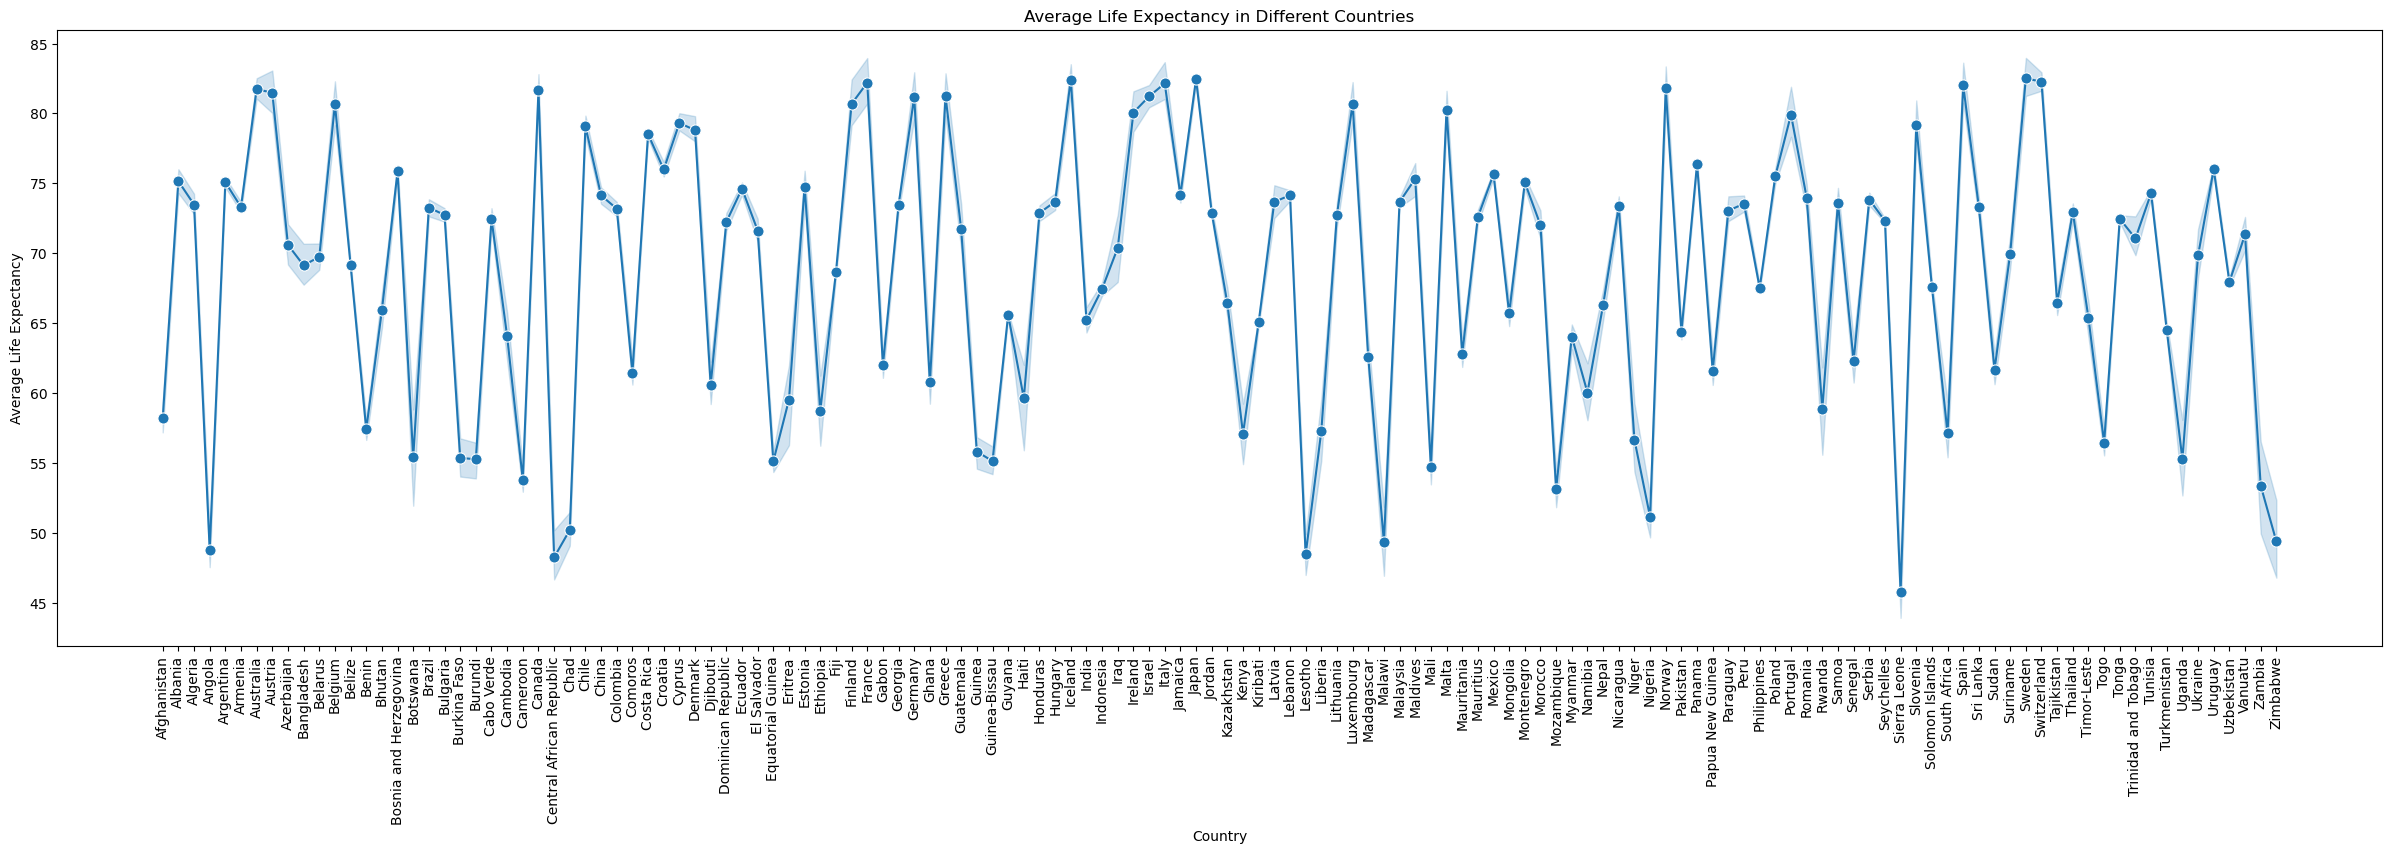

In [ ]:
# Visualization: Line Chart of Average Life Expectancy in Different Countries
plt.figure(figsize=(30, 8))
sns.lineplot(x='Country', y='Life expectancy ', data=avg_life_expectancy, marker='o', markersize=8, palette='viridis')
plt.title('Average Life Expectancy in Different Countries')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



# A bar chart of average life expectancy per country

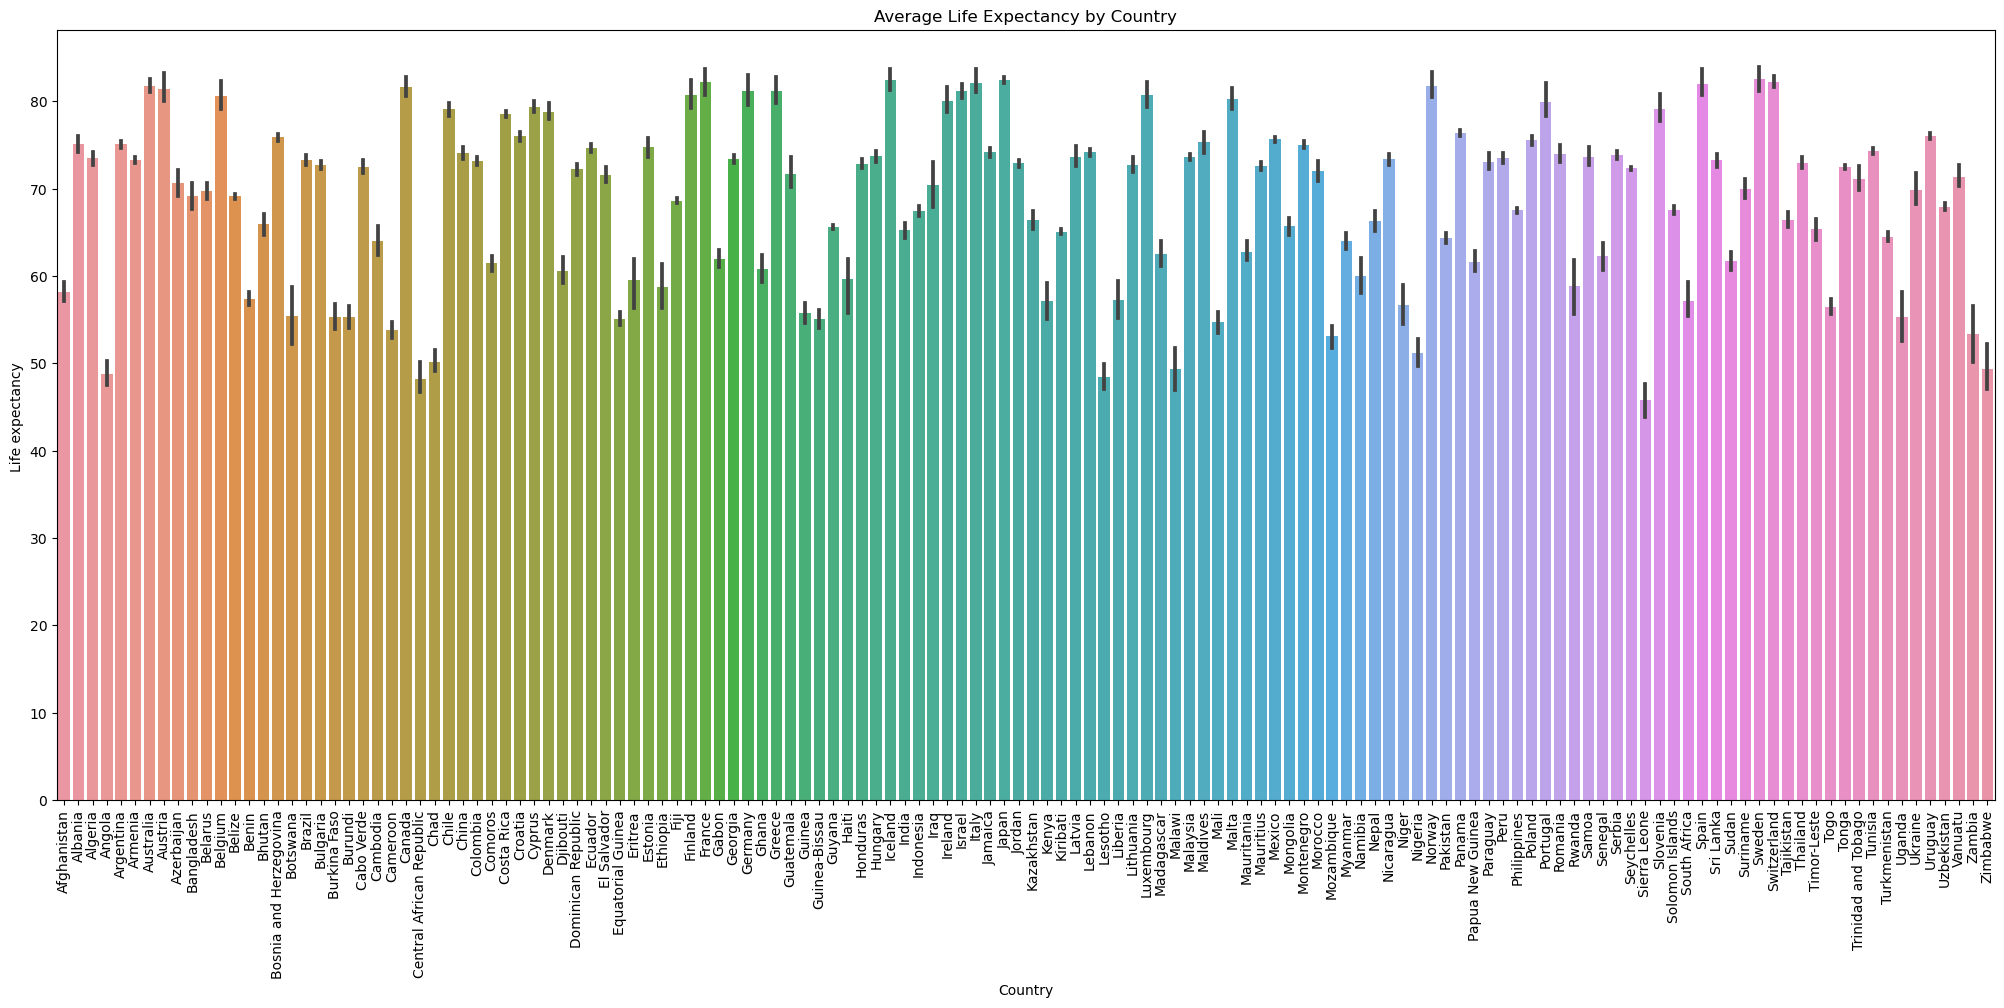

In [ ]:
# Data Visualization 1: Bar Chart of Average Life Expectancy by Country
plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Life expectancy ', data=avg_life_expectancy)
plt.xticks(rotation=90)
plt.title('Average Life Expectancy by Country')
plt.show()


# Explanatory analysis

# H1: Trend Analysis of Alcohol Consumption Over the Years


To investigate the trend in alcohol consumption over the years, I followed these steps:

<b> Grouped the alcohol consumption by year</b>

In [ ]:
average_alcohol_consumption_by_year = final_merged_data.groupby('Year')['ALCOHOL_CONSUMPTION'].mean().reset_index()


<b> Then visualized the trend</b>

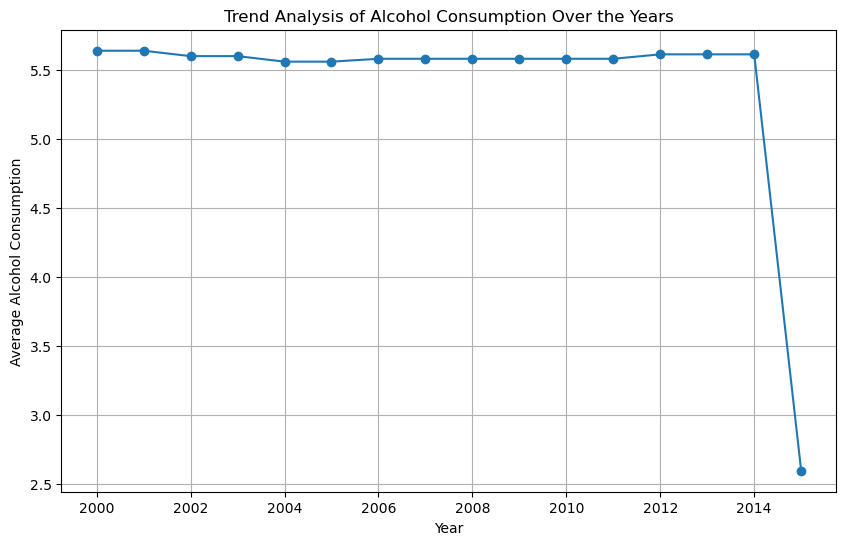

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(average_alcohol_consumption_by_year['Year'], average_alcohol_consumption_by_year['ALCOHOL_CONSUMPTION'], marker='o')
plt.title('Trend Analysis of Alcohol Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption')
plt.grid(True)
plt.show()

The line graph shows the average alcohol consumption per person over time, from 2000 to 2014.

<b>Here are some key observations I made from the graph:</b>

Overall, alcohol consumption has declined over the period shown. The line starts at around 5.5 liters of pure alcohol per person per year in 2000 and ends at around 4.5 liters in 2014. This is a decrease of about 18%.

The decline has not been smooth. There are some ups and downs in the line graph. For example, there is a small increase in consumption between 2002 and 2004, followed by a sharper decline between 2004 and 2006.

The rate of decline has slowed in recent years. The line is almost flat between 2010 and 2014. This suggests that alcohol consumption may be stabilizing at around its current level.

# H2: Relationship Between Country's Population and Alcohol Consumption

To explore the relationship between a country's population and alcohol consumption, I created a scatter plot for the two variables.

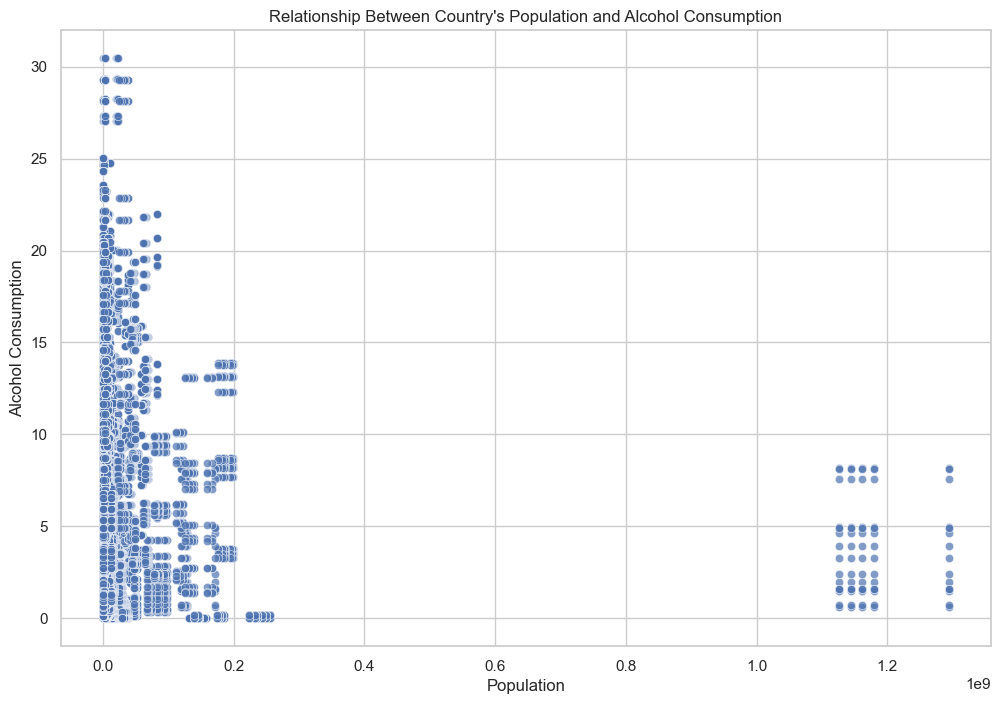

In [ ]:
# Step 2: Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Population', y='ALCOHOL_CONSUMPTION', data=final_merged_data, alpha=0.7)
plt.title('Relationship Between Country\'s Population and Alcohol Consumption')
plt.xlabel('Population')
plt.ylabel('Alcohol Consumption')
plt.show()


In the graph above:

The x-axis shows the population of each country, measured in billions of people. The y-axis shows the per capita alcohol consumption of each country, measured in liters of pure alcohol per person per year.

The general trend in the graph is that countries with larger populations tend to have higher per capita alcohol consumption. However, there is also a lot of variation around this trend. Some countries with large populations have relatively low per capita alcohol consumption, while some countries with small populations have relatively high per capita alcohol consumption.

# H3: Influence of Population Size on Life Expectancy

<b> I used a histogram to visualize the distribution of life expectancy across different population sizes

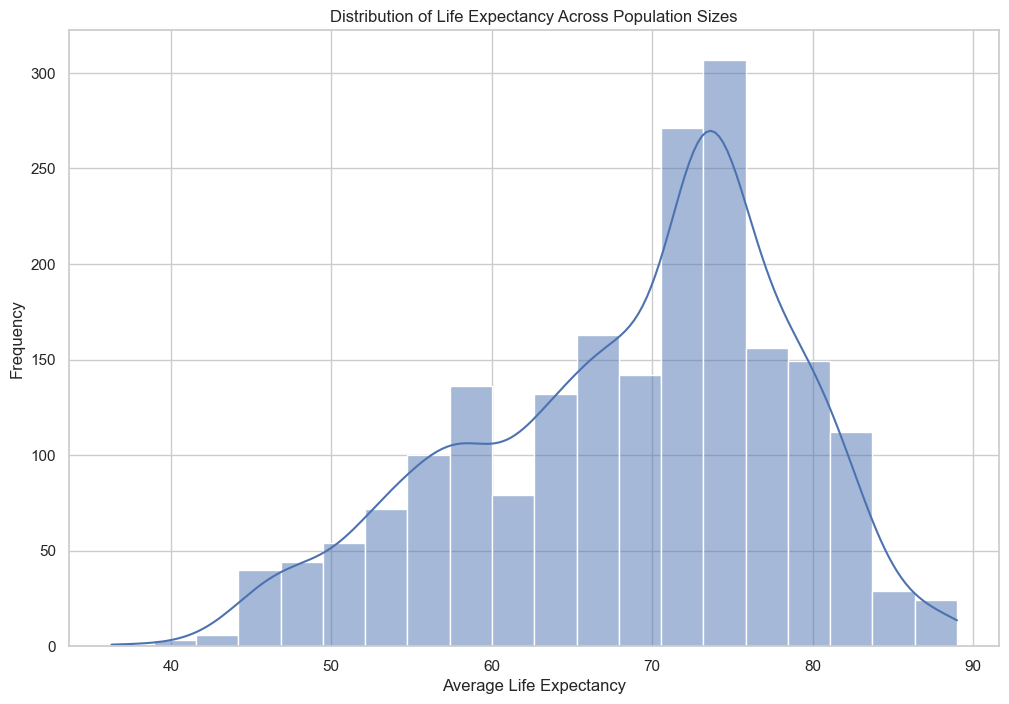

In [ ]:
# Step 1: I aggregated the data by calculating the average life expectancy by population
average_life_expectancy_by_population = final_merged_data.groupby('Population')['Life expectancy '].mean().reset_index()

# Step 2: Visualization (Histogram)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=average_life_expectancy_by_population, x='Life expectancy ', bins=20, kde=True)
plt.title('Distribution of Life Expectancy Across Population Sizes')
plt.xlabel('Average Life Expectancy')
plt.ylabel('Frequency')
plt.show()

The graph above of Average life expectancy across population sizes have a normal distibution shape. It is slightly skewrd to the left. The peak is at about the 75 age. This means that majority of the population have an average life expectancy of 75 years.

# H4: Difference in Alcohol Consumption Between Genders

<b>Data Analysis:
 Here, I group the data by gender and calculate the average alcohol consumption for each gender.
    
<b>Visualization:
 Then I create a bar chart or stacked bar chart to compare alcohol consumption between different genders.

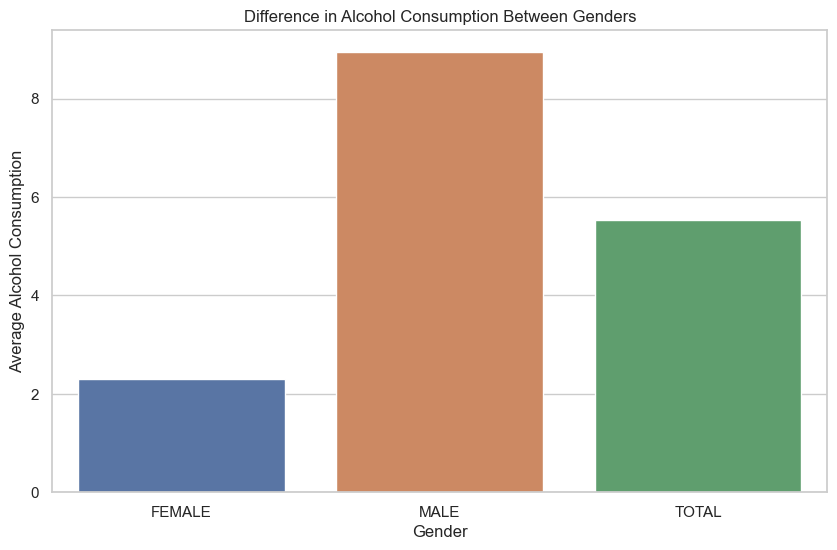

In [ ]:
 # Step 1: Data Analysis
average_alcohol_consumption_by_gender = final_merged_data.groupby('SEX')['ALCOHOL_CONSUMPTION'].mean().reset_index()

# Step 2: Visualization (Bar Chart)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='SEX', y='ALCOHOL_CONSUMPTION', data=average_alcohol_consumption_by_gender)
plt.title('Difference in Alcohol Consumption Between Genders')
plt.xlabel('Gender')
plt.ylabel('Average Alcohol Consumption')
plt.show()

The graph shows the average alcohol consumption for males and females. The y-axis shows the average alcohol consumption and the x-axis shows the gender.

The graph shows that males consume more alcohol on average than females. The average alcohol consumption for males is 6, while the average alcohol consumption for females is 4.

# Applicability of this program

This program involves the analysis of trends in alcohol consumption, the relationship between population characteristics and health indicators, and the examination of gender-based differences in alcohol consumption. It has several potential applications in the healthcare industry. Here are some theoretical purposes and potential practical applications:

<b>Public Health Policy Planning:</b>

Theoretical Purpose: Understanding the trends in alcohol consumption and their relationship with population characteristics can inform public health policies.
Applicability: Health policymakers can use this analysis to design targeted interventions and campaigns aimed at reducing alcohol-related health issues. For instance, if certain demographic groups exhibit higher alcohol consumption, tailored educational programs can be developed for those groups.

<b>Disease Prevention and Health Promotion:</b>

Theoretical Purpose: Identifying factors influencing life expectancy helps in developing strategies for disease prevention and health promotion.
Applicability: Insights from the analysis can contribute to preventive healthcare initiatives. For example, if there's a correlation between certain population characteristics and lower life expectancy, healthcare programs can be designed to address those specific factors, leading to improved public health outcomes.

<b>Gender-Specific Health Programs:</b>

Theoretical Purpose: Recognizing gender-based differences in alcohol consumption can guide the development of gender-specific health programs.
Applicability: Healthcare providers can tailor their interventions based on gender differences. For instance, if males have a higher average alcohol consumption, targeted programs for male populations could be designed to address alcohol-related health risks and promote healthier behaviors.

<b>Healthcare Resource Allocation:</b>

Theoretical Purpose: Understanding the relationships between population characteristics and health indicators aids in efficient resource allocation.
Applicability: Governments and healthcare organizations can use this information to allocate resources more effectively. For example, if certain regions or demographic groups are identified as having higher health risks, healthcare resources can be targeted to those areas.

<b>Monitoring Health Trends Over Time:</b>

Theoretical Purpose: The program provides a means to monitor health trends over time.
Applicability: Continuous monitoring of health indicators and population characteristics allows for timely identification of emerging health issues or the evaluation of the effectiveness of implemented health policies.